In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/labeled_twitter_depressive_full_clean_km2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            123984 non-null  object 
 1   depression      123984 non-null  float64
 2   not_depression  123984 non-null  float64
 3   cluster         123984 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ MB


In [ ]:
print(df.isnull().sum().sum())
print(df.isna().sum().sum())
print(df.duplicated().sum().sum())

0
0
786


In [ ]:
np.where(df['text'].isnull())[0]

array([], dtype=int64)

In [ ]:
duplicates = df[df.duplicated(keep=False)]
duplicates_index = duplicates.index.tolist()
print("Índices de instancias duplicadas:")
print(duplicates_index)

Índices de instancias duplicadas:
[10, 26, 33, 80, 188, 376, 400, 570, 904, 1123, 1133, 1139, 1356, 1577, 1758, 1844, 1886, 1945, 1954, 1988, 2197, 2287, 2297, 2360, 2466, 2693, 2701, 2744, 2753, 2770, 2865, 2907, 2985, 3000, 3110, 3241, 3253, 3296, 3379, 3443, 3444, 3457, 3472, 3511, 3541, 3672, 3720, 3901, 3907, 3915, 4122, 4375, 4407, 4520, 4547, 4551, 4681, 4799, 4830, 4852, 4859, 4992, 5003, 5159, 5262, 5272, 5683, 5801, 5917, 5980, 5998, 6060, 6230, 6242, 6446, 6655, 6657, 6695, 6705, 6773, 6816, 6850, 6903, 7077, 7124, 7235, 7263, 7383, 7641, 7854, 7984, 8039, 8140, 8186, 8207, 8463, 8510, 8569, 8811, 8872, 8907, 8978, 9030, 9077, 9265, 9275, 9284, 9310, 9326, 9369, 9392, 9539, 9608, 9646, 9650, 9798, 9845, 10037, 10141, 10227, 10733, 10761, 10825, 11075, 11198, 11229, 11284, 11292, 11333, 11507, 11594, 11660, 11740, 11750, 11776, 11895, 12285, 12298, 12475, 12742, 12773, 12965, 13077, 13080, 13082, 13084, 13094, 13263, 13340, 13392, 13399, 13431, 13795, 13997, 14000, 14002, 140

In [ ]:
print(df['text'][26])
print(df['text'][33])

india
india


In [ ]:
df = df.drop(['depression', 'not_depression'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     123984 non-null  object
 1   cluster  123984 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
df.groupby('cluster').count()

,text
cluster,
0,70509
1,53475


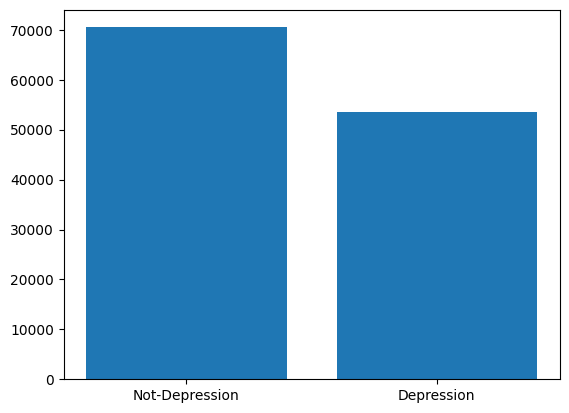

In [ ]:
classes = df.cluster.unique()
counts = []

for i in classes:
  count = len(df[df.cluster==i])
  counts.append(count)

plt.bar(['Not-Depression', 'Depression'], counts)
plt.show()

In [ ]:
def tweet_cleaner(text, remove_words):
  # removing k words
  words = text.split()
  filter_text = [word for word in words if word not in remove_words]

  text = ' '.join(filter_text)
  return text

In [ ]:
df['text'][126]

'hi airindia cancelled tickets air india customer care executive confirmed call cancelled tickets upon request sent email ecommerce response could help check'

In [ ]:
# K words to remove
remove_w = {'come', 'country', 'gonna', 'days', 'india'}

df['text'] = df['text'].apply(lambda x: tweet_cleaner(x, remove_w))

In [ ]:
df['text'][126]

'hi airindia cancelled tickets air customer care executive confirmed call cancelled tickets upon request sent email ecommerce response could help check'

In [ ]:
print(df.isnull().sum().sum())
print(df.isna().sum().sum())
print(df.duplicated().sum().sum())

0
0
829


In [ ]:
np.where(df['text'].isnull())[0]

array([], dtype=int64)

In [ ]:
duplicates_two = df[df.duplicated(keep=False)]
duplicates_index_two = duplicates_two.index.tolist()
print("Índices de instancias duplicadas:")
print(duplicates_index_two)

Índices de instancias duplicadas:
[10, 26, 33, 80, 188, 376, 400, 483, 570, 747, 904, 1123, 1133, 1139, 1338, 1356, 1577, 1758, 1808, 1844, 1886, 1945, 1954, 1988, 2038, 2197, 2287, 2297, 2320, 2360, 2466, 2540, 2693, 2701, 2744, 2753, 2770, 2865, 2907, 2985, 3000, 3110, 3241, 3253, 3269, 3296, 3379, 3443, 3444, 3457, 3472, 3511, 3541, 3606, 3611, 3649, 3672, 3720, 3901, 3907, 3915, 4122, 4375, 4407, 4520, 4547, 4551, 4681, 4799, 4800, 4830, 4852, 4859, 4992, 5003, 5159, 5262, 5272, 5648, 5683, 5801, 5825, 5917, 5979, 5980, 5998, 6060, 6230, 6242, 6446, 6655, 6657, 6695, 6705, 6773, 6816, 6850, 6903, 6992, 7077, 7124, 7162, 7235, 7263, 7383, 7636, 7641, 7854, 7984, 8039, 8140, 8186, 8207, 8463, 8510, 8569, 8811, 8872, 8907, 8978, 9030, 9077, 9265, 9275, 9284, 9310, 9326, 9369, 9392, 9539, 9608, 9646, 9650, 9798, 9845, 10037, 10141, 10227, 10733, 10761, 10825, 11075, 11198, 11229, 11284, 11292, 11333, 11507, 11594, 11660, 11740, 11750, 11776, 11895, 12285, 12298, 12475, 12742, 12773, 12

In [ ]:
print(df['text'][26])
print(df['text'][33])

In [ ]:
df_filter_duplicates = df.drop_duplicates(keep='first')

In [ ]:
df_filter_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123155 entries, 0 to 123983
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     123155 non-null  object
 1   cluster  123155 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
print(df_filter_duplicates.isnull().sum().sum())
print(df_filter_duplicates.isna().sum().sum())
print(df_filter_duplicates.duplicated().sum().sum())

0
0
0


In [ ]:
np.where(df_filter_duplicates['text'].isnull())[0]

array([], dtype=int64)

In [ ]:
duplicates_three = df_filter_duplicates[df_filter_duplicates.duplicated(keep=False)]
duplicates_index_three = duplicates_three.index.tolist()
print("Índices de instancias duplicadas:")
print(duplicates_index_three)

Índices de instancias duplicadas:
[]


In [ ]:
df_filter_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123155 entries, 0 to 123983
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     123155 non-null  object
 1   cluster  123155 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


# Word Count

In [ ]:
# Function to count words in an instance
def word_count(text):
    return len(text.split())

In [ ]:
df_text = pd.DataFrame(df_filter_duplicates['text'])

# Add a column with the number of words
df_filter_duplicates['num_palabras'] = df_text['text'].apply(word_count)

# Finding the minimum word length
min_palabras = df_filter_duplicates['num_palabras'].min()
print(min_palabras)

# Find all instance with the minimum number of words and save the indices
min_indices = df_filter_duplicates[df_filter_duplicates['num_palabras'] == min_palabras].index
print(min_indices)

0
Index([26, 1844], dtype='int64')


<ipython-input-25-da73c64e6850>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_duplicates['num_palabras'] = df_text['text'].apply(contar_palabras)


In [ ]:
df_filter_duplicates['text'][26]

''

In [ ]:
df_filter_duplicates['text'][1844]

''

In [ ]:
# Delete rows with the found indexes
df_filter = df_filter_duplicates.drop(min_indices)

print("\nÍndices eliminados:")
print(min_indices.tolist())


Índices eliminados:
[26, 1844]


In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123153 entries, 0 to 123983
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          123153 non-null  object
 1   cluster       123153 non-null  int64 
 2   num_palabras  123153 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.8+ MB


In [ ]:
df_filter.groupby('cluster').count()

,text,num_palabras
cluster,,
0,69959,69959
1,53194,53194


In [ ]:
df_filter = df_filter.drop(['num_palabras'], axis=1)
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123153 entries, 0 to 123983
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     123153 non-null  object
 1   cluster  123153 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
df_filter.tail(10)

,text,cluster
123974,personal liberty granted,0
123975,unprecedented step,0
123976,shahmahmoodqureshi said reports backing state ...,0
123977,military spokesman claimed evidence indian int...,0
123978,mind heart,0
123979,unification ttp breakaway factions jua hua aug...,1
123980,happydiwali dgisi dgispr real face exposed tod...,0
123981,anybody know website ships pre order bts seaso...,0
123982,hinted weeks back interview today presented ev...,0
123983,slice pakistan national security advisor world...,1


In [ ]:
df_filter.index = pd.RangeIndex(len(df_filter.index))

In [ ]:
df_filter.to_csv("labeled_twitter_RNN_km2_Exp-10w_remove-5-words_SHAP-LIME_improve.csv", index=False)

In [ ]:
data = pd.read_csv('labeled_twitter_RNN_km2_Exp-10w_remove-5-words_SHAP-LIME_improve.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123153 entries, 0 to 123152
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     123153 non-null  object
 1   cluster  123153 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
data.tail(10)

,text,cluster
123143,personal liberty granted,0
123144,unprecedented step,0
123145,shahmahmoodqureshi said reports backing state ...,0
123146,military spokesman claimed evidence indian int...,0
123147,mind heart,0
123148,unification ttp breakaway factions jua hua aug...,1
123149,happydiwali dgisi dgispr real face exposed tod...,0
123150,anybody know website ships pre order bts seaso...,0
123151,hinted weeks back interview today presented ev...,0
123152,slice pakistan national security advisor world...,1


In [ ]:
print(data.isnull().sum().sum())
print(data.isna().sum().sum())
print(data.duplicated().sum().sum())

0
0
0
